In [ ]:
# Project: NGuard
# http://205.174.165.80/CICDataset/CIC-IDS-2017/Dataset/MachineLearningCSV.zip

'\n# REF: https://www.hs-coburg.de/forschung/forschungsprojekte-oeffentlich/informationstechnologie/cidds-coburg-intrusion-detection-data-sets.html\n# Data Resource1: https://www.hs-coburg.de/fileadmin/hscoburg/WISENT-CIDDS-001.zip\n# Data Resource2:  https://www.hs-coburg.de/fileadmin/hscoburg/WISENT-CIDDS-002.zip\n'

**Download dataset**
- download the zip
- concatenate csv file as a single csv file
- convert csv into pandas dataframe

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


import pandas as pd
import numpy as np
import glob
import pathlib
import os
from joblib import dump,load

def extract_dataset():
  file_name = pathlib.Path("*.parquet")
  if not file_name.exists ():
    import zipfile
    with zipfile.ZipFile(os.getcwd()+"/drive/MyDrive/attackdataset.zip","r") as zip_ref:
      zip_ref.extractall()

  folder_path = os.getcwd() 
  return folder_path  


def read_as_dataframe(master_file):
  file_name = pathlib.Path("merged.parquet")
  if not file_name.exists ():
    df = pd.concat(master_file,ignore_index=True)
    df.to_parquet('merged.parquet',index=False)
  else:  
    df = pd.read_parquet(file_name,engine='pyarrow')
  return df


Mounted at /content/drive


**Testing**

In [ ]:
def test_performance(model,x_test,y_test,multiclass=True):
     
    from sklearn.metrics import f1_score,confusion_matrix,ConfusionMatrixDisplay
    from sklearn.metrics import precision_recall_curve, precision_score
    from sklearn.metrics import recall_score
    from sklearn.metrics import average_precision_score



    y_predicted = model.predict(x_test)
    if multiclass==True:
      score = f1_score(y_test,y_predicted,average='micro')
      print('F1 Score: %.3f' % score)
      cmatrix = confusion_matrix(y_test,y_predicted,labels=np.unique(y_test))
      cm_obj = ConfusionMatrixDisplay(cmatrix,display_labels=np.unique(y_test))
      cm_obj.plot()
      cm_obj.ax_.set(
                      title='Sklearn Confusion Matrix with labels!!', 
                      xlabel='Predicted Class', 
                      ylabel='True Class')



      print('Precison',precision_score(y_test, y_predicted, average='macro'))
      print('Recall',recall_score(y_test, y_predicted, average='macro'))
      print('Misclassification',(cmatrix[0][1]+cmatrix[1][0])/(cmatrix[0][0]+cmatrix[0][1]+cmatrix[1][0]+cmatrix[1][1]))
      print('\n')


      print('Accuracy',(cmatrix[0][0]+cmatrix[1][1])/(cmatrix[0][0]+cmatrix[0][1]+cmatrix[1][0]+cmatrix[1][1]))
      print('FPR(A classicifed as B)',(cmatrix[1][0])/(cmatrix[1][0]+cmatrix[1][1]))
    else:
      score = f1_score(y_test,y_predicted,average='micro')
      print('F1 Score: %.3f' % score)
      cmatrix = confusion_matrix(y_test,y_predicted,labels=[0,1])
      print('\nConfusion  matrix')
      print(cmatrix)

  

**Operations**

In [ ]:
dirpath = extract_dataset()

dos_data = pd.read_parquet(f'{dirpath}/dos.parquet',engine="pyarrow")
ddos_data = pd.read_parquet(f'{dirpath}/ddos.parquet',engine="pyarrow")
port_data =  pd.read_parquet(f'{dirpath}/portscan.parquet',engine="pyarrow")
patator_data =  pd.read_parquet(f'{dirpath}/patator.parquet',engine="pyarrow")
web_data = pd.read_parquet(f'{dirpath}/web.parquet',engine="pyarrow")

print('dos', dos_data['Label'].value_counts())
print('ddos', ddos_data['Label'].value_counts())
print('portscan', port_data['Label'].value_counts())
print('patator', patator_data['Label'].value_counts())
print('webattack', web_data['Label'].value_counts())



dos 1    440031
0    252672
Name: Label, dtype: int64
ddos 1    414322
0    128027
Name: Label, dtype: int64
portscan 1    414322
0    158930
Name: Label, dtype: int64
patator 1    432074
0     13835
Name: Label, dtype: int64
webattack 1    456752
0      2180
Name: Label, dtype: int64


In [ ]:

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

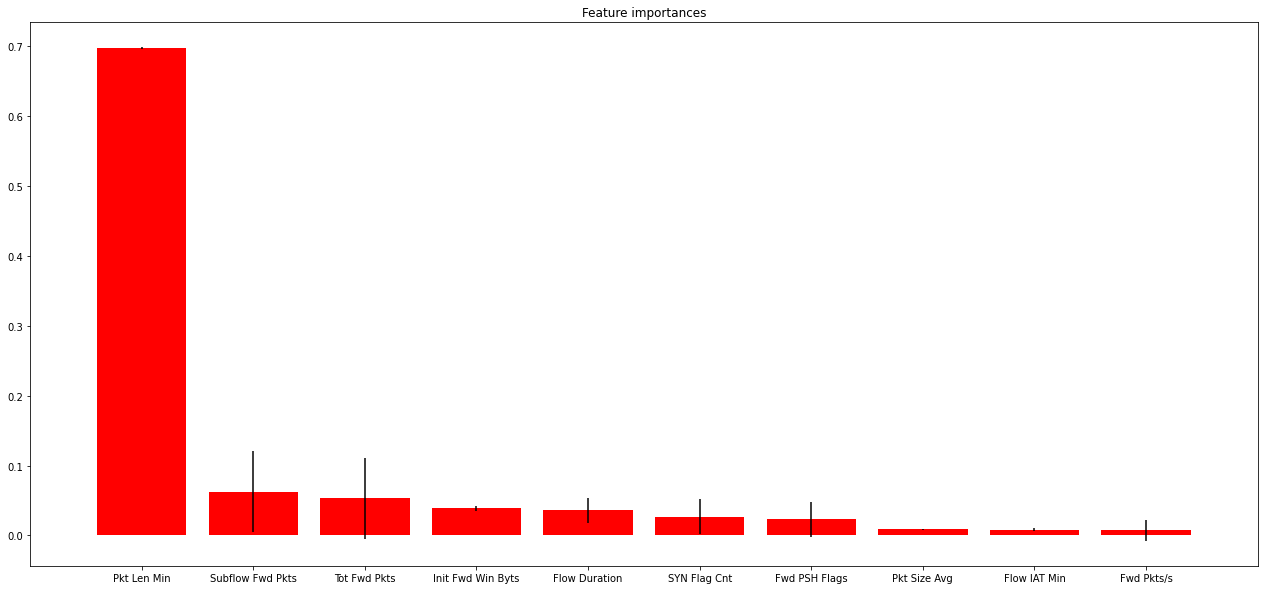

Index(['Pkt Len Min', 'Subflow Fwd Pkts', 'Tot Fwd Pkts', 'Init Fwd Win Byts',
       'Flow Duration', 'SYN Flag Cnt', 'Fwd PSH Flags', 'Pkt Size Avg',
       'Flow IAT Min', 'Fwd Pkts/s', 'Bwd Pkt Len Min', 'Fwd IAT Min',
       'Flow IAT Mean', 'Init Bwd Win Byts', 'Fwd IAT Mean', 'Fwd IAT Tot',
       'Fwd Seg Size Min', 'URG Flag Cnt', 'Fwd IAT Max', 'Flow IAT Max',
       'FIN Flag Cnt', 'Bwd IAT Tot', 'Fwd Pkt Len Std', 'Fwd Pkt Len Mean',
       'Fwd Header Len', 'Fwd Seg Size Avg', 'Bwd Pkt Len Std',
       'Fwd Pkt Len Min', 'Flow IAT Std', 'Idle Min', 'PSH Flag Cnt',
       'Fwd Pkt Len Max', 'ACK Flag Cnt', 'Bwd Pkts/s', 'Fwd IAT Std',
       'Pkt Len Std', 'Subflow Bwd Byts', 'Pkt Len Var', 'Bwd Pkt Len Mean',
       'Bwd Pkt Len Max', 'Idle Max', 'Idle Mean', 'Active Mean',
       'Pkt Len Mean', 'TotLen Fwd Pkts', 'Active Min', 'Active Max',
       'TotLen Bwd Pkts', 'Bwd Seg Size Avg', 'Pkt Len Max', 'Bwd Header Len',
       'Bwd IAT Mean', 'Subflow Fwd Byts', 'Bwd IAT M

In [ ]:
# lets do for benign and dos

X = dos_data.drop('Label', axis=1)
Y = dos_data['Label'].copy()      
# X_train, X_test, Y_train, Y_test = train_test_split(X,Y,stratify=Y,test_size=0.25)
nr = NearMiss()
X,Y = nr.fit_resample(X.values,Y.values.astype('int'))


dos = RandomForestRegressor(random_state=2,n_jobs=-1)
dos.fit(X, Y)

dump(dos,'dosregressor')
importances = dos.feature_importances_
std = np.std([tree.feature_importances_ for tree in dos.estimators_],
             axis=0)

indices = np.argsort(importances)[::-1]
plt.figure(figsize=(22,10))
plt.title("Feature importances")
n=10
_ = plt.bar(range(n), importances[indices][:n], color="r", yerr=std[indices][:n])
plt.xticks(range(n), dos_data.columns[indices])
plt.xlim([-1, n])
plt.show()
print(dos_data.columns[indices])

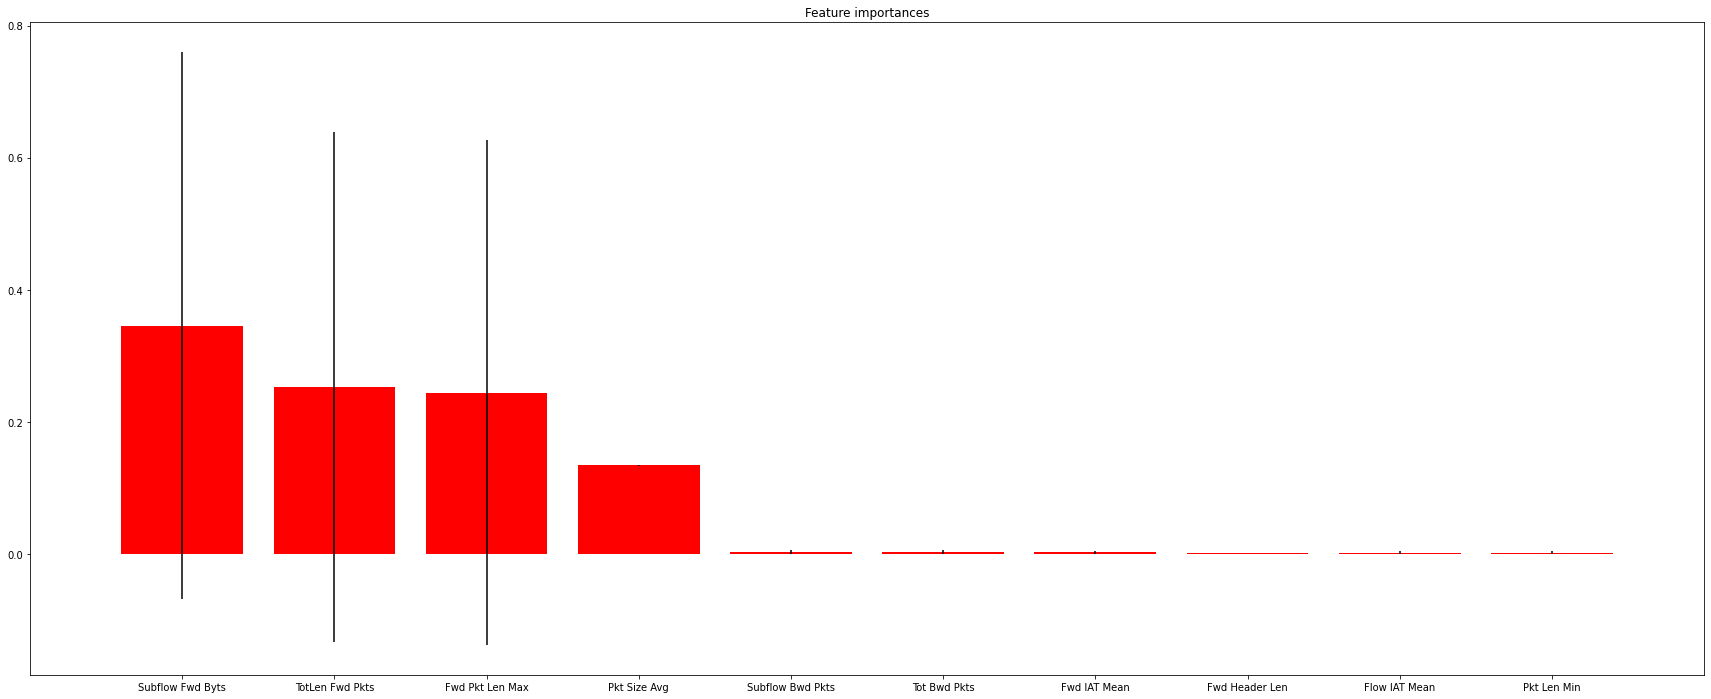

In [ ]:
#friday portscan

X = port_data.drop('Label', axis=1)
Y = port_data['Label'].copy()          

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,stratify=Y,test_size=0.25)

nr = SMOTE()
X,y = nr.fit_resample(X_train.values,Y_train.values.astype('int'))
ports = RandomForestRegressor(random_state=2,n_jobs=-1)
ports.fit(X, y)
dump(ports,"portsregressor")

importances = ports.feature_importances_
std = np.std([tree.feature_importances_ for tree in ports.estimators_],
             axis=0)
import matplotlib.pyplot as plt
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(30,12))
plt.title("Feature importances")
n=10
_ = plt.bar(range(n), importances[indices][:n], color="r", yerr=std[indices][:n])
plt.xticks(range(n), port_data.columns[indices])
plt.xlim([-1, n])
plt.show()


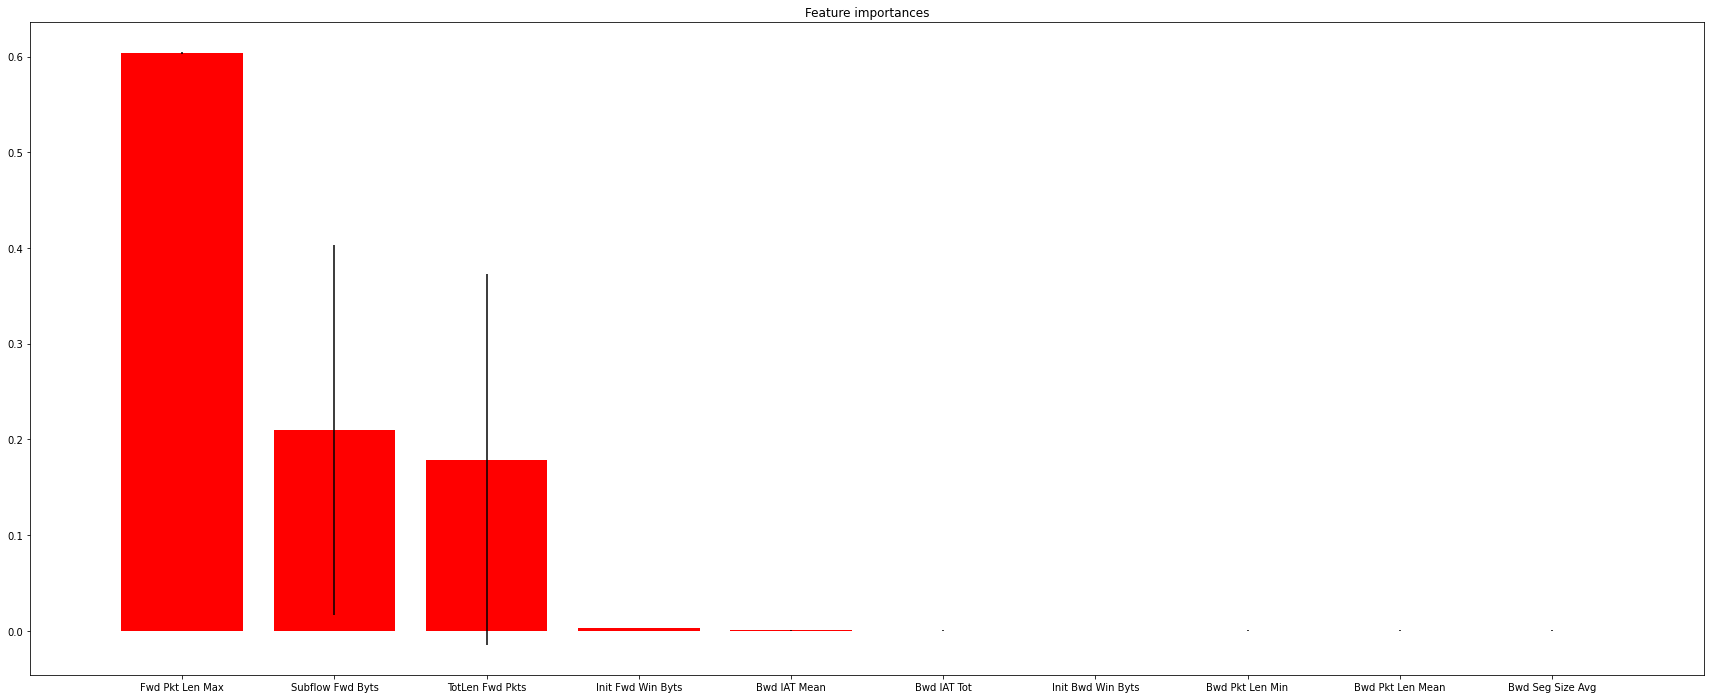

In [ ]:


#ddos 
        
X = ddos_data.drop('Label', axis=1)
Y = ddos_data['Label'].copy()  
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,stratify=Y,test_size=0.25)

nr = SMOTE()
X,y = nr.fit_resample(X_train.values,Y_train.values.astype('int'))
ddos = RandomForestRegressor(random_state=2,n_jobs=-1)
ddos.fit(X, y)



dump(ddos,"ddosregressor")
importances = ddos.feature_importances_
std = np.std([tree.feature_importances_ for tree in ddos.estimators_],
             axis=0)
import matplotlib.pyplot as plt
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(30,12))
plt.title("Feature importances")
n=10
_ = plt.bar(range(n), importances[indices][:n], color="r", yerr=std[indices][:n])
plt.xticks(range(n), ddos_data.columns[indices])
plt.xlim([-1, n])
plt.show()


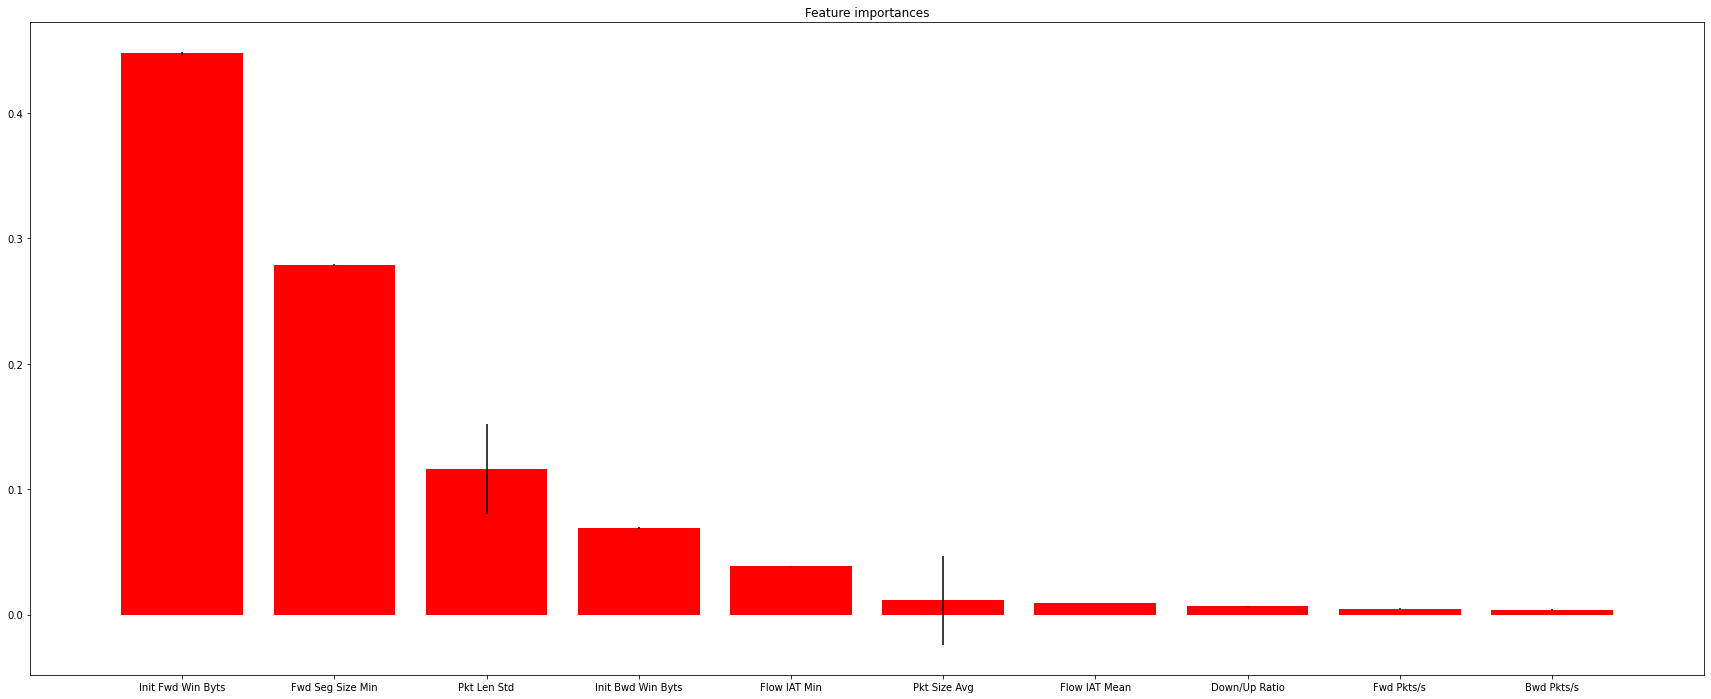

In [ ]:
# tuesday patator


X = patator_data.drop('Label', axis=1)
Y = patator_data['Label'].copy()          

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,stratify=Y,test_size=0.25)

nr = SMOTE()
X,y = nr.fit_resample(X_train.values,Y_train.values.astype('int'))
patator = RandomForestRegressor(random_state=2,n_jobs=-1)
patator.fit(X, y)

dump(patator,"patatorregressor")

importances = patator.feature_importances_
std = np.std([tree.feature_importances_ for tree in patator.estimators_],
             axis=0)
import matplotlib.pyplot as plt
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(30,12))
plt.title("Feature importances")
n=10
_ = plt.bar(range(n), importances[indices][:n], color="r", yerr=std[indices][:n])
plt.xticks(range(n), patator_data.columns[indices])
plt.xlim([-1, n])
plt.show()




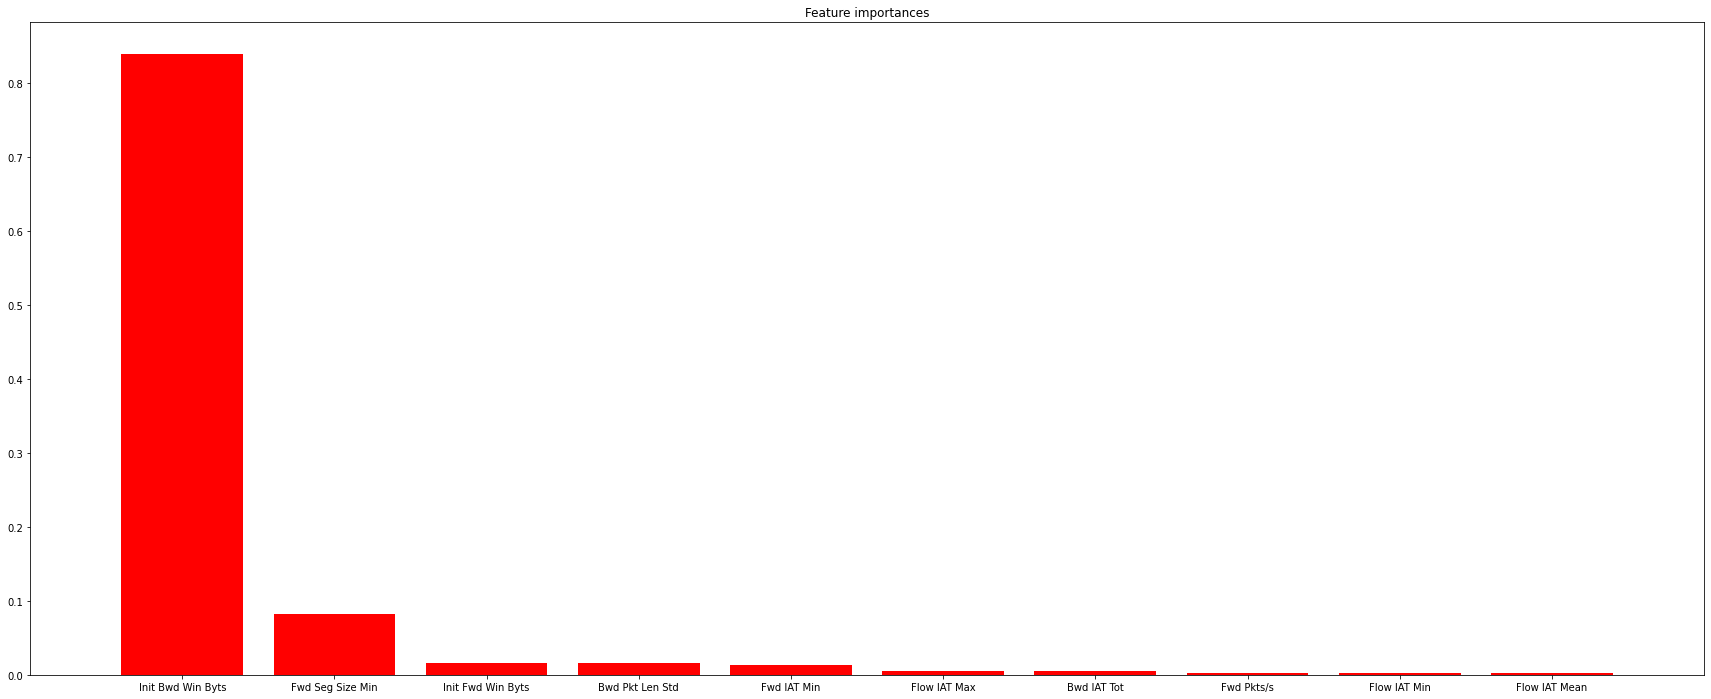

In [ ]:
#web attack thursday

X = web_data.drop('Label', axis=1)
Y = web_data['Label'].copy()          
      

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, stratify=Y,test_size=0.25)

nr = SMOTE()
X,y = nr.fit_resample(X_train,Y_train.values.astype('int'))
web= RandomForestRegressor(random_state=2,n_jobs=-1)
web.fit(X, y)
dump(web,"webregressor")


importances = web.feature_importances_
std = np.std([web.feature_importances_ for tree in web.estimators_],
             axis=0)
import matplotlib.pyplot as plt
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(30,12))
plt.title("Feature importances")
n=10
_ = plt.bar(range(n), importances[indices][:n], color="r", yerr=std[indices][:n])
plt.xticks(range(n), web_data.columns[indices])
plt.xlim([-1, n])
plt.show()

